# Algorithmes de tri récursifs : tri par fusion et tri rapide


Ces 2 algorithmes sont basés sur une  technique algorthmique qui s’appelle “diviser pour régner” et qui consiste à :

- diviser : découper un problème initial en sous-problèmes ;
- régner : résoudre les sous-problèmes (récursivement ou directement s'ils sont assez petits) ;
- combiner : calculer une solution au problème initial à partir des solutions des sous-problèmes.


## Tri par fusion  (Merge Sort)


L'algorithme de tri par fusion est naturellement décrit de façon récursive :
- Si la liste n'a qu'un élément, elle est déjà triée.
- Sinon, on découpe la liste en deux parties à peu près égales.
- On trie récursivement les deux parties avec l'algorithme du tri fusion.
- On fusionne les deux listes triées en une liste triée.


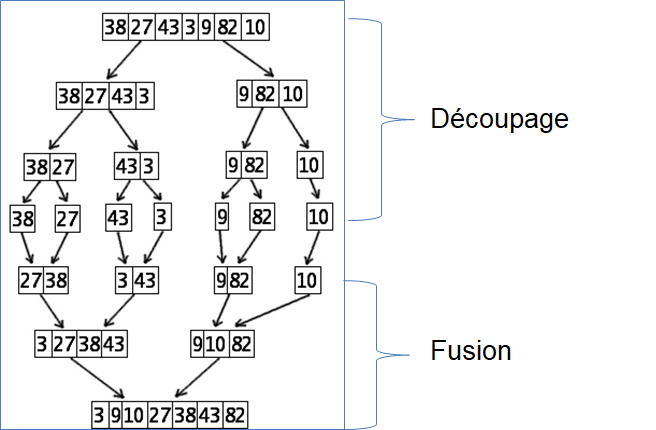

La terminaison de la récursivité est garantie, car les découpages seront tels qu'on aboutira à des sous-parties d'un seul élément, le tri devient alors trivial.


In [3]:
def fusion(liste1,liste2):
    if len(liste1)==0:
        return liste2
    if len(liste2)==0:
        return liste1
    
    if liste1[0] < liste2[0]:
        return [liste1[0]]+fusion(liste1[1:],liste2)
    else:
        return [liste2[0]]+fusion(liste1,liste2[1:])

def tri_fusion(liste):
    print(liste)
    if len(liste)<=1:
        return liste
    m=len(liste)//2
    return fusion(tri_fusion(liste[:m]),tri_fusion(liste[m:]))

liste=[9,7,5,2,10]
print(tri_fusion(liste))

[9, 7, 5, 2, 10]
[9, 7]
[9]
[7]
[5, 2, 10]
[5]
[2, 10]
[2]
[10]
[2, 5, 7, 9, 10]


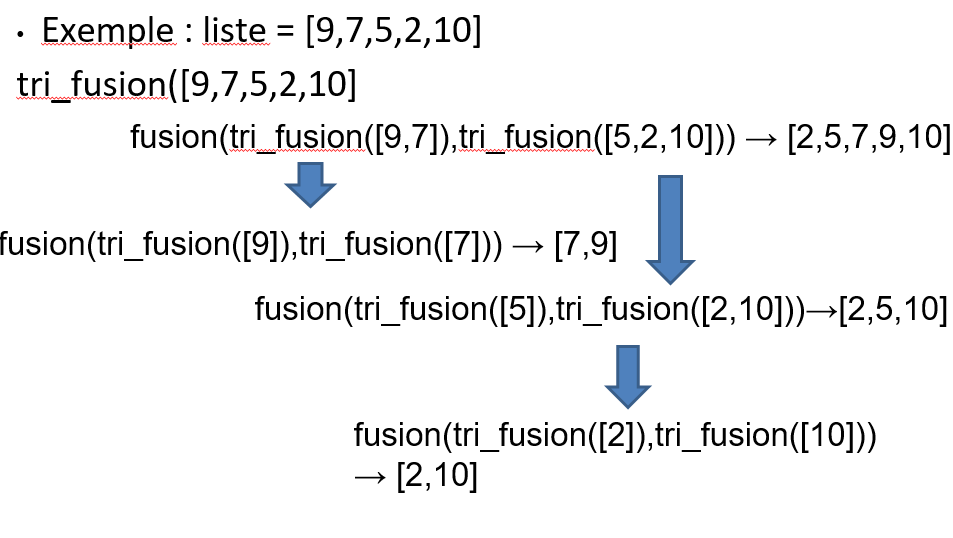

**Le tri par fusion est un tri stable**

### Complexité d'un tri par fusion :
$$ C(n)=1 \textrm{ pour } n=1$$

$$C(n)=2C(\frac{n}{2})+n \textrm{ pour n!=1 } \textrm{ 2 appels recursifs + cout de la fusion } $$  

$$\textrm{soit : } n=2^p$$

$$C(2^p)=2C(2^{p-1})+2^p$$

$$\frac{C(2^p)}{2^p}=\frac{2C(2^{p-1})}{2^{p-1}}+1 $$

$$\textrm{Si on pose } u_p=\frac{C(2^p)}{2^{p}}$$

$$\textrm{On aura } u_p=1+u_{p-1}$$

$$\textrm{avec } u_0=1 \textrm{ car } C(1)=1$$

$$u_p \textrm{est une suite arithmétique dont le terme général qui vaut : } u_p=1+p$$

$$\textrm{Or } n=2^p \textrm{alors } p=log_2(n)$$

$$\textrm{Donc } C(n)=n(1+log_2(n))=n(log_2(n))$$



## Tri rapide (Quicksort)


La méthode consiste à choisir un élément de la liste (appelé pivot) et créer deux autres listes :

- la première contenant tous les éléments qui sont inférieurs au pivot
- la deuxième contenant tous les éléments qui lui sont supérieurs.

Cette opération s'appelle le partitionnement. Pour chacune des sous-listes, on choisit un nouveau pivot et on répète l'opération de partitionnement. Ce processus est répété récursivement, jusqu'à ce que l'ensemble des éléments soit trié.


Par exemple, si on choisit le pivot comme le premier élément de la liste :

In [ ]:
def tri_rapide(liste):
    if len(liste)<=1:
        return liste
    pivot=liste[0]
    listeinf=[]
    listesup=[]
    for elt in liste[1:]:
        if elt < pivot:
            listeinf.append(elt)
        else:
            listesup.append(elt)
    return tri_rapide(liste_inf)+[pivot]+tri_rapide(listesup)        

liste=[4,8,9,2,1,0]
print(tri_rapide(liste))
    

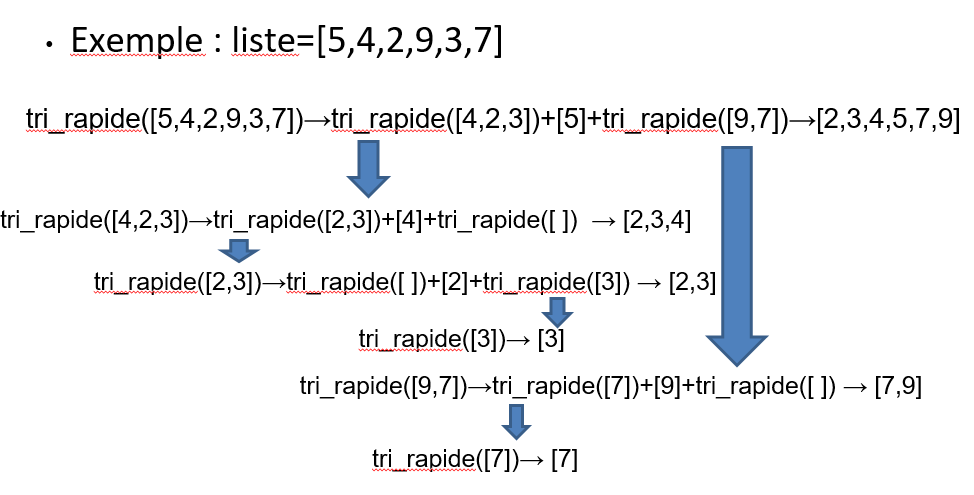

**Complexité d'un tri rapide**

$$\textrm{Meilleur cas : } O(nlog_2n)$$ 

- Ca arrive quand les pivots successifs divisent la liste en 2 sous-listes de taille presque équivalente.

$$\textrm{Pire des cas : }  O(n^2) $$

- Un tel cas a lieu quand dans une liste est triée ou presque triée et le pivot est le premier élément ou le dernier élément. Ou bien, le pivot est le maximum ou le minimum des éléments. Alors, les sous-listes ont des tailles déséquilibrées et on ira plus en profondeur dans la récursivité. Quelles sont les solutions à adopter pour éviter qu'un tel cas se produit ?

1- Mélanger les elements de la liste aléatoirement (c'est pas la meilleure)
2- Choisir un pivot aléatoire
3- Prendre aux choix 3 éléments et de calculer leur médiane  

In [8]:
liste=[7,8,92,100]
import random
random.shuffle(liste)
print(liste)


[100, 7, 8, 92]


**Le tri rapide est un tri instable**

## Comparaison de la complexité des différents algorithmes de tri :

Les algorithmes de tri à complexité quadratique :

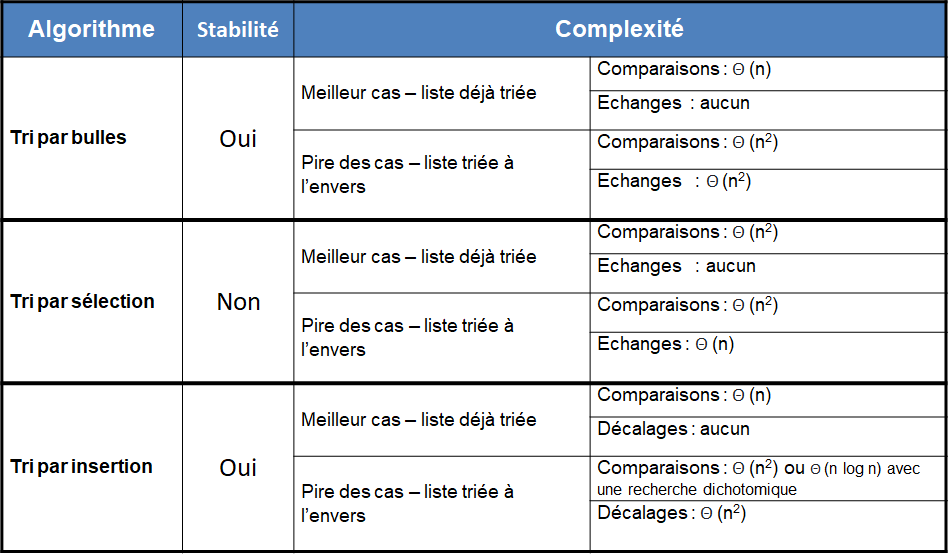

Les algorithmes à complexité linéarithmique :

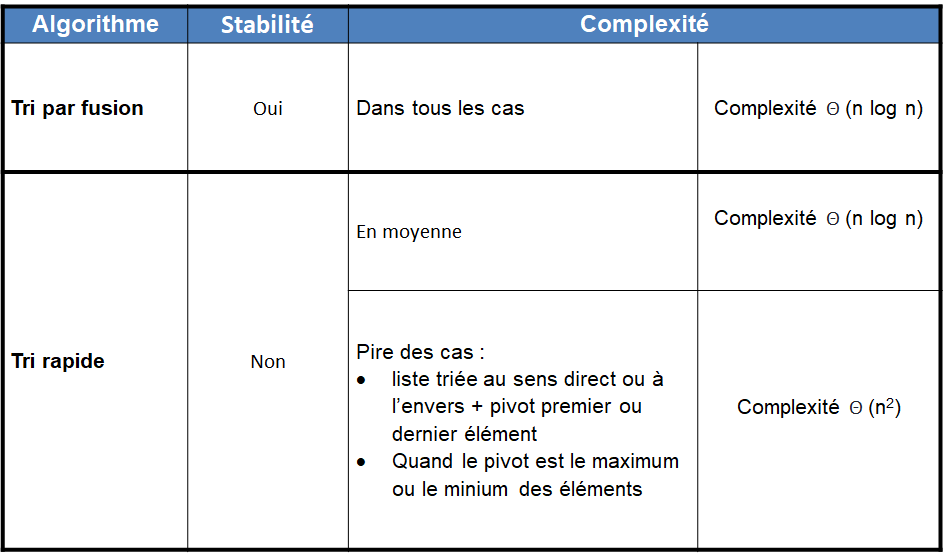

Pour plus d'informations sur les algorithmes de tri : https://fr.wikipedia.org/wiki/Algorithme_de_tri

L'algorithme de tri uitlisé par Python est le Timsort. C'est un algorithme hybride dérivé de l'algorithme de tri par fusion et du tri par insertion développé en 2002. C'est un tri stable de complexité Θ(n) dans le meilleur cas et Θ(n log n) dans le pire des cas. La méthode "sort" de la classe list et la fonction "sorted" utilisent cet algorithme. 

In [9]:
liste=[4,5,9,6,6,8,1]
print(sorted(liste)) #ne modifie pas la liste initiale. Elle retourne une nouvelle liste triée
print(liste)
liste.sort() #modifie la liste
print(liste)

[1, 4, 5, 6, 6, 8, 9]
[4, 5, 9, 6, 6, 8, 1]
[1, 4, 5, 6, 6, 8, 9]
